In [25]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn import linear_model
import tkinter as tk 
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from sklearn import linear_model
import tkinter as tk 
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import numpy as np
import seaborn as sns

In [26]:
df = pd.read_csv('csvFiles/Marketing Raw Data.csv')
df

(185, 11)


,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
0,09/11/20,46.0,34.0,11.0,11.0,2020.0,Monday,707.0,465.0,651.375,No Promo
1,10/11/20,46.0,34.0,11.0,11.0,2020.0,Tuesday,1455.0,10386.0,1298.250,Promotion Red
2,11/11/20,46.0,34.0,11.0,11.0,2020.0,Wednesday,1520.0,12475.0,1559.375,Promotion Blue
3,12/11/20,46.0,34.0,11.0,11.0,2020.0,Thursday,1726.0,11712.0,1801.750,No Promo
4,13/11/2020,46.0,34.0,11.0,11.0,2020.0,Friday,2134.0,10000.0,2614.500,No Promo


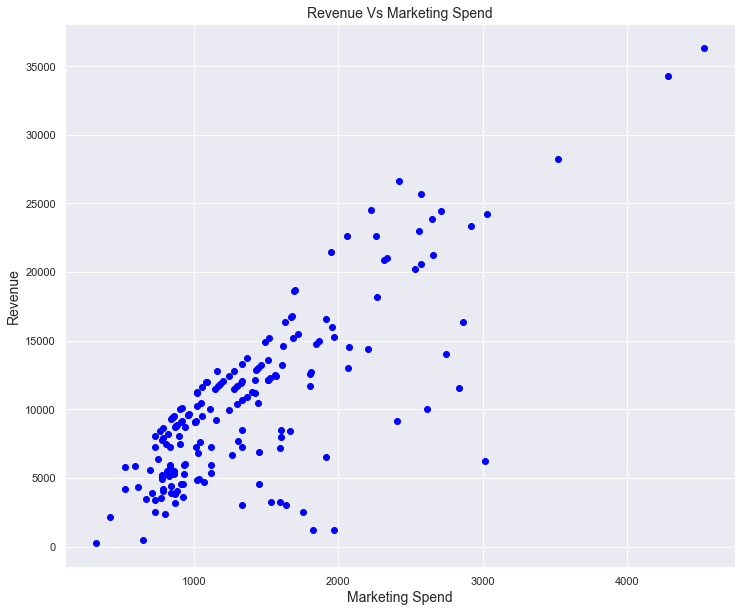

In [27]:
plt.scatter(df['Marketing Spend'], df['Revenue'], color='blue')
plt.xlabel('Marketing Spend', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.grid(True)
plt.title('Revenue Vs Marketing Spend', fontsize=14)
plt.show()

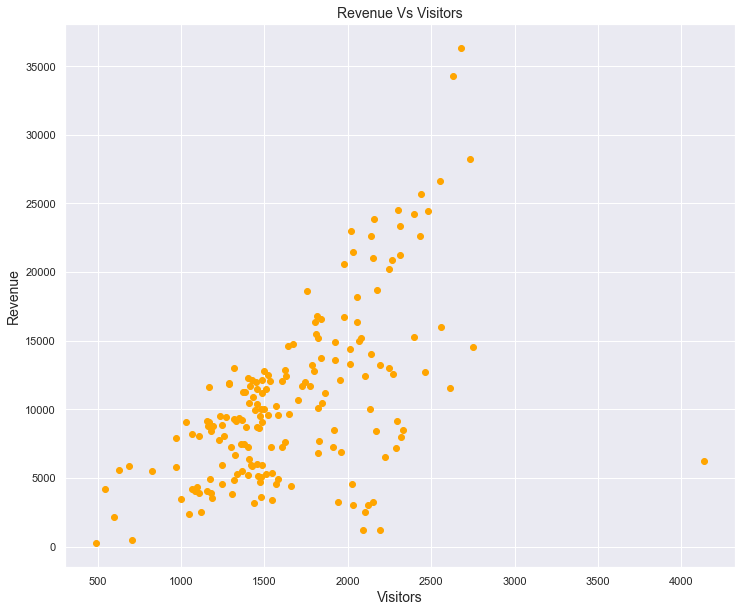

In [28]:
plt.scatter(df['Visitors'], df['Revenue'], color='orange')
plt.xlabel('Visitors', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.title('Revenue Vs Visitors', fontsize=14)
plt.grid(True)
plt.show()

In [29]:
X = df[['Marketing Spend','Visitors']].astype(float) 
Y = df['Revenue'].astype(float)
df1=df.dropna(axis=0, how="any", thresh=None, subset=None, inplace=False)
regr = linear_model.LinearRegression()
regr.fit(X,Y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [3]:
# tkinter GUI
root= tk.Tk()

canvas1 = tk.Canvas(root, width = 500, height = 300)
canvas1.pack()

# with sklearn
Intercept_result = ('Intercept: ', regr.intercept_)
label_Intercept = tk.Label(root, text=Intercept_result, justify = 'center')
canvas1.create_window(260, 220, window=label_Intercept)

# with sklearn
Coefficients_result  = ('Coefficients: ', regr.coef_)
label_Coefficients = tk.Label(root, text=Coefficients_result, justify = 'center')
canvas1.create_window(260, 240, window=label_Coefficients)

# New_Interest_Rate label and input box
label1 = tk.Label(root, text='Enter Marketing Spend: ')
canvas1.create_window(100, 100, window=label1)

entry1 = tk.Entry (root) # create 1st entry box
canvas1.create_window(270, 100, window=entry1)

# New_Unemployment_Rate label and input box
label2 = tk.Label(root, text='Enter Visitors: ')
canvas1.create_window(120, 120, window=label2)

entry2 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(270, 120, window=entry2)

def values(): 
    global New_Marketing_Spend #our 1st input variable
    New_Marketing_Spend = float(entry1.get()) 
    
    global New_Visitors #our 2nd input variable
    New_Visitors = float(entry2.get()) 
    
    Prediction_result  = ('Predicted Revenuee: ', regr.predict([[New_Marketing_Spend ,New_Visitors]]))
    label_Prediction = tk.Label(root, text= Prediction_result, bg='orange')
    canvas1.create_window(260, 280, window=label_Prediction)
    
button1 = tk.Button (root, text='Predict Revenue',command=values, bg='orange') # button to call the 'values' command above 
canvas1.create_window(270, 150, window=button1)
 
#plot 1st scatter 
figure3 = plt.Figure(figsize=(5,4), dpi=100)
ax3 = figure3.add_subplot(111)
ax3.scatter(df['Marketing Spend'].astype(float),df['Revenue'].astype(float), color = 'blue')
scatter3 = FigureCanvasTkAgg(figure3, root) 
scatter3.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax3.legend(['Revenue']) 
ax3.set_xlabel('Marketing Spend')
ax3.set_title('Marketing Spend Vs. Revenue')

#plot 2nd scatter 
figure4 = plt.Figure(figsize=(5,4), dpi=100)
ax4 = figure4.add_subplot(111)
ax4.scatter(df['Visitors'].astype(float),df['Revenue'].astype(float), color = 'orange')
scatter4 = FigureCanvasTkAgg(figure4, root) 
scatter4.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax4.legend(['Revenue']) 
ax4.set_xlabel('Visitors')
ax4.set_title('Visitors Vs. Revenue')

root.mainloop()

NameError: name 'regr' is not defined